# Project Image classification using CNN - Reena Rajendra Prasad
Git Hub : https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-Reena-R/blob/master/CNN_Project_Reena_Final.ipynb

**Project Description – Image classification using CNNs in Keras**

The goal of the project is to create a classifier capable of determining a plant's species from a photo.

**Dataset** is provided with images of plant seedlings at various stages of growth. Each image has a filename that is its unique id. The dataset comprises 12 plant species.


In [ ]:
#Import necessary Libraries 
import numpy as np
from numpy import asarray
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Dataset**

In [ ]:
#Load the Image Dataset
img_path = "/content/drive/My Drive/AIML/CNN Project/images.npy"
img_file= np.load(img_path)

In [ ]:
#Shape of the Data
img_file.shape

(4750, 128, 128, 3)

**Datset  Description**  from Shape :   4750 images of shape 128 X 128   with 3 Channels 

In [ ]:
#Load  the Labels from the CSV File provided
df=pd.read_csv("/content/drive/My Drive/AIML/CNN Project/Labels.csv")

In [ ]:
#Label data
df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [ ]:
#Shape of Image Labels
df.shape

(4750, 1)

In [ ]:
#Uique Label Values  and counts
df['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

In [ ]:
df['Label'].value_counts(normalize=True)*100

Loose Silky-bent             13.768421
Common Chickweed             12.863158
Scentless Mayweed            10.863158
Small-flowered Cranesbill    10.442105
Fat Hen                      10.000000
Charlock                      8.210526
Sugar beet                    8.105263
Cleavers                      6.042105
Black-grass                   5.536842
Shepherds Purse               4.863158
Maize                         4.652632
Common wheat                  4.652632
Name: Label, dtype: float64

**Insights** : The Image data is not a balanced dataset 

**Visualize images**

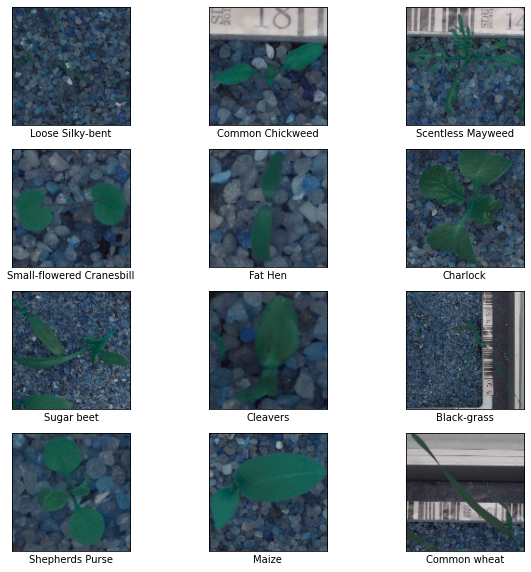

In [ ]:
#Show each Image of all  Y Categories

j=0
plt.figure(figsize=(10,10))
for col in (df['Label'].value_counts()).index:
  catindex=df[df['Label']==col].index[0]
  catLabel=df['Label'].iloc[catindex]
  plt.subplot(4,3,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  # print(catLabel)
  # cv2_imshow(img_file[catindex])
  plt.imshow(img_file[catindex])
  plt.xlabel(catLabel)
  j+=1
  
  

## **Image Pre processing**

# **Normalize Data**

In [ ]:
# Conversion to float type from integer type.

img_file =img_file.astype('float32')/255.0


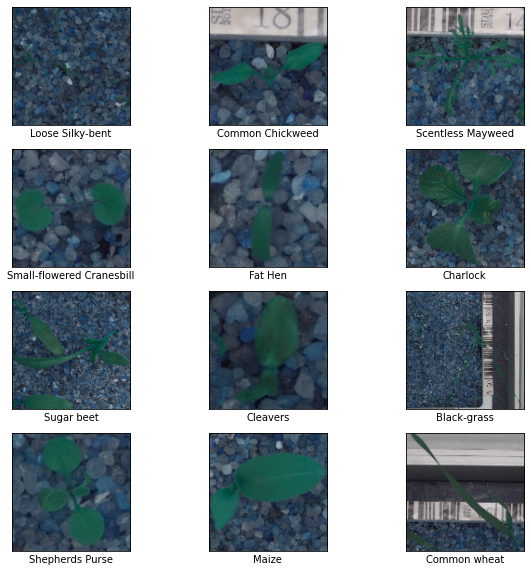

In [ ]:
#Show each Image of all  Y Categories

j=0
plt.figure(figsize=(10,10))
for col in (df['Label'].value_counts()).index:
  catindex=df[df['Label']==col].index[0]
  catLabel=df['Label'].iloc[catindex]
  plt.subplot(4,3,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  # print(catLabel)
  # cv2_imshow(img_file[catindex])
  plt.imshow(img_file[catindex],cmap=plt.cm.binary)
  plt.xlabel(catLabel)
  j+=1
  

In [ ]:
img_file.max()

1.0

# **Gaussian Blur**

In [ ]:
#Apply Gaussian Blur to remove noise
gaus_Img= np.empty((4750,128,128,3))
gaus_Img= gaus_Img.astype(float)
for i,img in enumerate(img_file):
    blur_img = cv2.GaussianBlur(img, (3, 3), 0)
    gaus_Img[i]=blur_img
  

In [ ]:
gaus_Img.max()

1.0

**Visualize data after pre-processing**

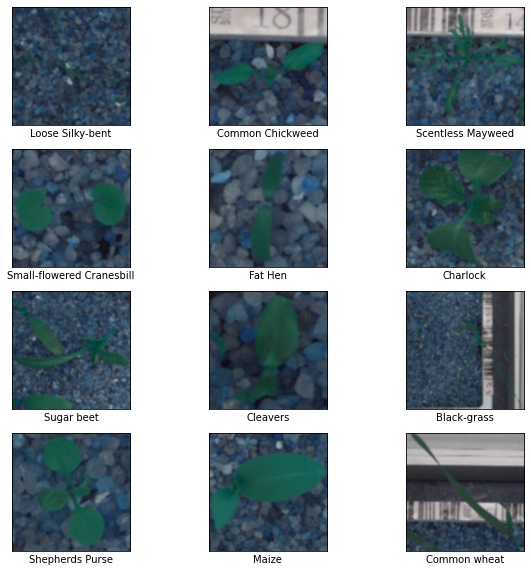

In [ ]:
#Print Images after Normalization and  Gaussian Blur 
j=0
plt.figure(figsize=(10,10))
for col in (df['Label'].value_counts()).index:
  catindex=df[df['Label']==col].index[0]
  catLabel=df['Label'].iloc[catindex]
  plt.subplot(4,3,j+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  # print(catLabel)
  # cv2_imshow(gaus_Img[catindex])
  plt.imshow(gaus_Img[catindex],cmap=plt.cm.binary)
  plt.xlabel(catLabel)
  j+=1
  

# **Converting Image Labels to One Hot Encoded **

In [ ]:
Y=df['Label']
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
Y = enc.fit_transform(Y)


In [ ]:
#The Outpot clasees in VAriable for later Refrence
Output_classes =enc.classes_
print(Output_classes )

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [ ]:
#Shape of Y
Y.shape

(4750, 12)

# Split Data into Test, Train and Validation  sets

In [ ]:
## 70 % - 30 %  split for Train test
X=gaus_Img
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [ ]:
print(len(X_train),len(X_test))

3325 1425


In [ ]:
#SPlit Validation Data  from the test set
X_test, X_val, y_test, y_val =train_test_split(X_test, y_test, test_size=0.5, random_state=5)

In [ ]:
print(len(X_test),len(X_val))

712 713


**Print one hot encoded Y_train[0]**

In [ ]:
print(y_train[0])

[0 0 0 0 0 0 1 0 0 0 0 0]


**Print label value for  Y_train[0]**

In [ ]:
print("Label for Y_train[0] >> : ",Output_classes[y_train[0].argmax()])

Label for Y_train[0] >> :  Loose Silky-bent


** Check The shape of Data**

In [ ]:
print(y_train.shape)

(3325, 12)


In [ ]:
X_train[0].shape

(128, 128, 3)

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
X_val=np.array(X_val)

In [ ]:
X_train.shape

(3325, 128, 128, 3)

In [ ]:

# X_train =X_train.astype('float32')/255
# X_test =X_test.astype('float32')/255
# X_val =X_val.astype('float32')/255

In [ ]:
X_train[0]

array([[[0.14019608, 0.2127451 , 0.27058825],
        [0.14362746, 0.21372549, 0.27156866],
        [0.14019608, 0.20588236, 0.26519608],
        ...,
        [0.23382354, 0.22058824, 0.23382354],
        [0.21715686, 0.20637256, 0.21715686],
        [0.20882353, 0.19901961, 0.20784314]],

       [[0.1382353 , 0.2112745 , 0.26911765],
        [0.14142157, 0.2115196 , 0.26911765],
        [0.14264706, 0.20686275, 0.2647059 ],
        ...,
        [0.23406863, 0.22156863, 0.23553923],
        [0.21764706, 0.20759805, 0.21838236],
        [0.20882353, 0.2       , 0.20833334]],

       [[0.13382354, 0.20588236, 0.26421571],
        [0.1382353 , 0.20661765, 0.2647059 ],
        [0.14950982, 0.21053922, 0.26740199],
        ...,
        [0.23578432, 0.22450981, 0.2379902 ],
        [0.21960784, 0.21102941, 0.22009805],
        [0.21029413, 0.20343137, 0.20931372]],

       ...,

       [[0.25539219, 0.31568629, 0.35980392],
        [0.23112747, 0.29289216, 0.33872551],
        [0.19656864, 0

# **Reshape  the Xvalues into Volume for CNN input**

In [ ]:

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


**The X-values are already in the keras required shape  and is represented as volumes  . So there is no need to Reshape**

# **Build the CNN Model**

<h1>Create the Model:<h1/>

- Convolutional input layer
 1. 32 feature maps with a size of 3x3 and a rectifier activation function.
 2. 64 Feature maps with 3x3
 3. 64 Feature maps with 3x3
 4. 64 Feature maps with 3x3
- Batch Normalization Layer follows every Convolution layer
- Max Pool layer with size 2×2  after every convolution layer
- Dropout layer at 10%, 20%,30% and 50%  after Maxpooling 
- Global Maxpooling Layer
- Flatten Layer
- Three Dense Layer with 256 neurons 
- Dense Layer with 12 output neurons with softmax activation layer



In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))


model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

In [ ]:
#Define the Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


In [ ]:
#Compile the model using Adam default optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])

In [ ]:
# Set the batch size, number of epochs.
batch_size = 32
epochs = 40


Epoch 1/40
104/104 [==============================] - 4s 28ms/step - loss: 2.9773 - accuracy: 0.1891 - val_loss: 2.4774 - val_accuracy: 0.1360
Epoch 2/40
104/104 [==============================] - 2s 24ms/step - loss: 1.6297 - accuracy: 0.4328 - val_loss: 2.7867 - val_accuracy: 0.1374
Epoch 3/40
104/104 [==============================] - 2s 24ms/step - loss: 1.3419 - accuracy: 0.5456 - val_loss: 3.3831 - val_accuracy: 0.1374
Epoch 4/40
104/104 [==============================] - 2s 24ms/step - loss: 1.1748 - accuracy: 0.6004 - val_loss: 2.5994 - val_accuracy: 0.1697
Epoch 5/40
104/104 [==============================] - 2s 24ms/step - loss: 1.0697 - accuracy: 0.6188 - val_loss: 2.2046 - val_accuracy: 0.2328
Epoch 6/40
104/104 [==============================] - 2s 24ms/step - loss: 0.9674 - accuracy: 0.6796 - val_loss: 2.0413 - val_accuracy: 0.2665
Epoch 7/40
104/104 [==============================] - 3s 24ms/step - loss: 0.8911 - accuracy: 0.6921 - val_loss: 1.3543 - val_accuracy: 0.5498

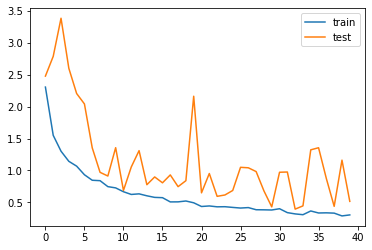

In [ ]:
#Fit the model
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# **Evaluating the Model**

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 9ms/step - loss: 0.4862 - accuracy: 0.8371
Test loss: 0.48615947365760803
Test accuracy: 0.8370786309242249


## **Predict**

In [ ]:
from sklearn import metrics

In [ ]:
Y_pred=model.predict(X_test)
Y_pred[0]

array([1.7966406e-04, 5.4845624e-03, 3.0119389e-03, 9.6491622e-03,
       2.8308557e-04, 2.3419654e-04, 1.7972327e-03, 2.5653061e-03,
       3.7298405e-01, 5.9768921e-01, 2.5767258e-03, 3.5448370e-03],
      dtype=float32)

In [ ]:
# Convert the predicted values into  integers for Confusion matrix
Predicted_vals=[]
for val in Y_pred:
  Predicted_vals.append(np.argmax(val))

In [ ]:
Predicted_vals[0]

9

In [ ]:
print(y_test)

[[0 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **Confusion Matrix**

**Convert the YTest into integer for Confusion matrix**

In [ ]:
Ytest_labels = pd.DataFrame(y_test).idxmax(axis=1)
Predicted_Labels = pd.DataFrame(Predicted_vals)[0]


In [ ]:
Ytest_labels.head()

0     9
1     1
2     5
3    11
4    10
dtype: int64

In [ ]:
Predicted_Labels .head()

0     9
1     1
2     5
3    11
4    10
Name: 0, dtype: int64

In [ ]:
#Confusion matrix
cm=metrics.confusion_matrix(Ytest_labels,Predicted_Labels)
print(cm)

[[24  0  0  0  2  0 11  0  0  0  0  0]
 [ 0 53  5  0  1  0  0  0  7  0  0  0]
 [ 0 10 29  0  1  0  0  0  3  0  1  0]
 [ 0  0  0 86  0  0  0  0  8  2  0  0]
 [ 0  0  0  0 26  0  2  0  0  0  0  0]
 [ 1  0  1  2  4 63  1  0  3  1  0  2]
 [ 5  0  0  0  1  0 79  0  2  0  0  0]
 [ 0  1  0  0  0  1  1 24  2  0  0  2]
 [ 0  0  0  1  0  0  1  0 80  0  0  0]
 [ 0  0  0  2  0  0  0  0 16 18  0  0]
 [ 0  0  0  0  0  0  0  0  7  5 54  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 60]]


In [ ]:

def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix(actual, predicted)
    plt.figure(figsize=(20,10))
    g=sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = Output_classes , yticklabels = Output_classes  ,cmap='Greens')
    g.set_xticklabels(g.get_xticklabels(), rotation = 30)
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

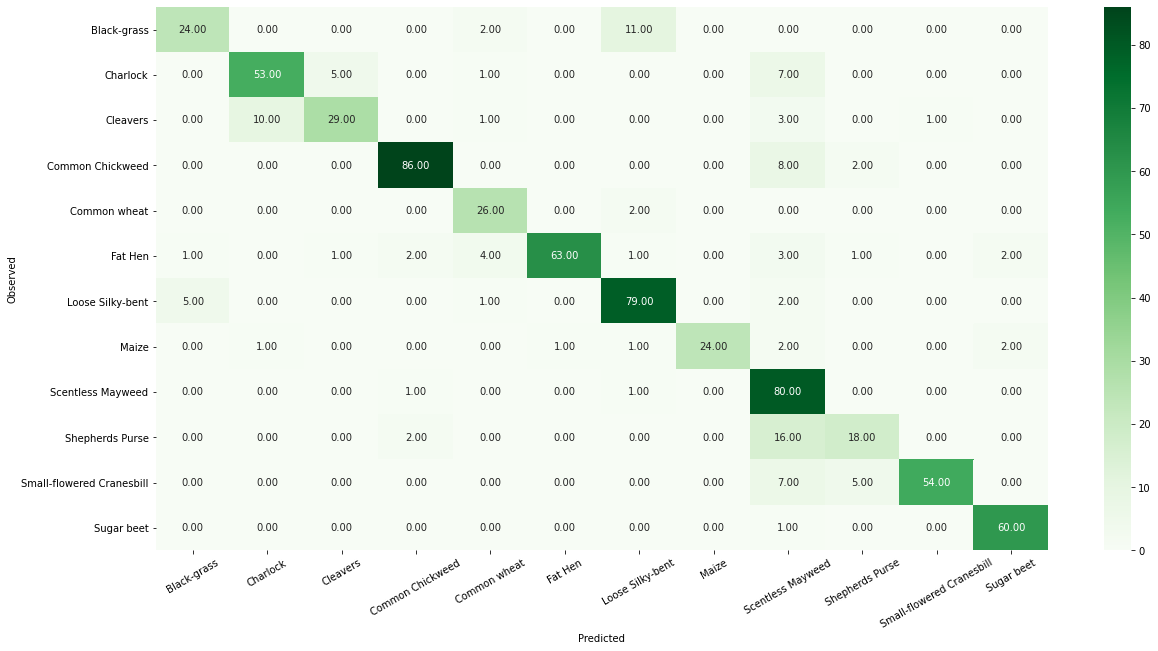

In [ ]:
##Confusion matrix ,heatmap representation
draw_cm(Ytest_labels,Predicted_Labels)

**Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].**

********************Predictions for XTest[2]******************


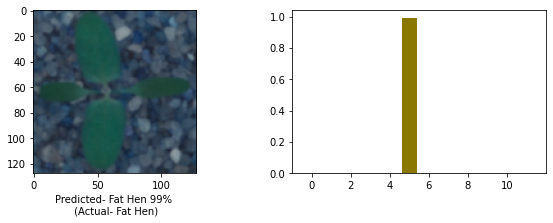

********************Predictions for XTest[3]******************


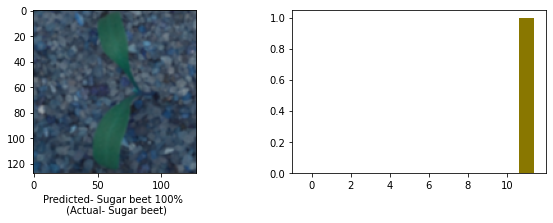

********************Predictions for XTest[33]******************


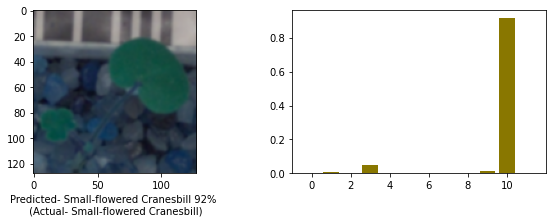

********************Predictions for XTest[36]******************


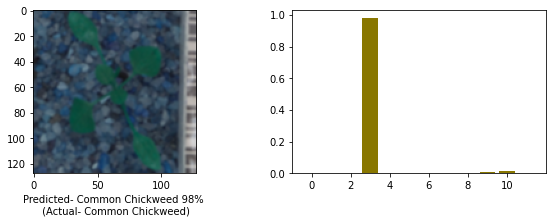

********************Predictions for XTest[59]******************


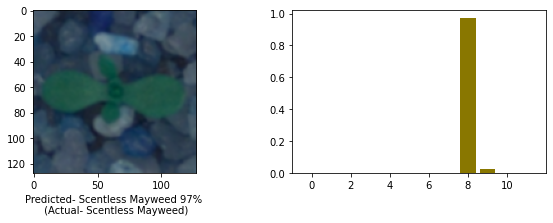

In [ ]:
for i in [2,3,33,36,59]:
  print("********************Predictions for XTest[{}]******************".format(i))
  ylabel=Ytest_labels[i]
  predlabel=Predicted_Labels[i]
  plt.figure(figsize=(10,3))
  plt.subplot(1,2,1)
  plt.xlabel("Predicted- {} {:2.0f}% \n (Actual- {})".format(Output_classes[predlabel],
                                100*np.max(Y_pred[i]),
                                Output_classes[ylabel]))
  
  plt.imshow(X_test[i], cmap=plt.cm.binary)

  plt.subplot(1,2,2)
  plt.bar(range(12), Y_pred[i], color="#897700")
  plt.show()